# YData Quality - DataQuality Tutorial
Time-to-Value: 4 minutes

This notebook provides a tutorial to run the `ydata_quality.DataQuality` main class that aggregates all the individual data quality engines, each focused on a main topic of data quality (e.g. duplicates, missing values).

**Structure:**

1. Load dataset
2. Distort dataset
3. Instantiate the Data Quality engine
4. Run the quality checks
5. Assess the warnings
6. (Extra) Detailed overview

In [1]:
import pandas as pd
import numpy as np
from ydata_quality import DataQuality

## Load the example dataset
We will use a transformed version of the "Guerry" dataset available from the statsmodels package.

In [2]:
df = pd.read_csv('../datasets/transformed/guerry_histdata.csv')

## Create the main engine
The DataQuality class aggregates all the individual data quality engines, each focused on a main topic of data quality (e.g. duplicates, missing values). To create a DataQuality object, you provide:
- df: target DataFrame, for which we will run the test suite
- target (optional): target feature to be predicted in a supervised learning context
- entities (optional): list of feature names for which checking duplicates after grouping-by is applicable.
- ed_extensions (optional): list of erroneous data values to append to the defaults.

In [3]:
ED_EXTENSIONS = ['a_custom_EDV', 999999999, '!', '', 'UNKNOWN']
SENSITIVE_FEATURES = ['Suicides', 'Crime_parents', 'Infanticide']

In [4]:
dq = DataQuality(df=df, label='Pop1831', ed_extensions=ED_EXTENSIONS, results_json_path='../datasets/original/taxi_long.json', sensitive_features=SENSITIVE_FEATURES, random_state=42)

### Full Evaluation
The easiest way to assess the data quality analysis is to run `.evaluate()` which returns a list of warnings for each quality check. 

[ENTITY DUPLICATES] There are no entities defined to run the analysis. Skipping the test.
[PREDEFINED ERRONEOUS DATA] No predefined ED values from  the set {'', 'unknown', 'unk', 'a_custom_edv', '?', '(blank)', 'na', '!', 'n/a', 999999999} were found in the dataset.


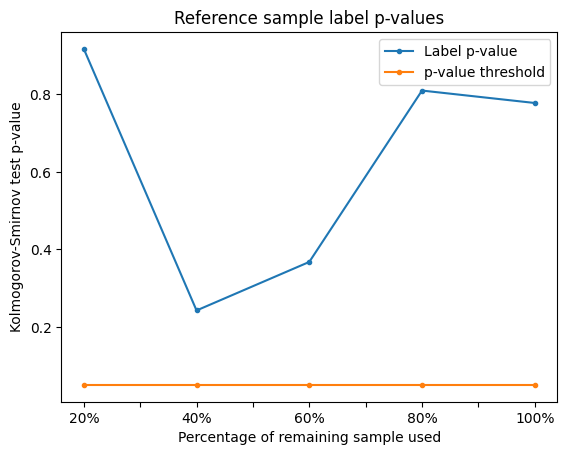

[MISSING LABELS] No missing labels were found.
[TEST NORMALITY] It was not possible to normalize the label values. See the warning message for additional context.


/home/fsantos/GitRepos/ydata-quality/src/ydata_quality/utils/correlations.py:132: RuntimeWarning: invalid value encountered in sqrt
  scaled_diag = np.diag(np.sqrt(1 / diag))
/home/fsantos/miniconda3/envs/DQ/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


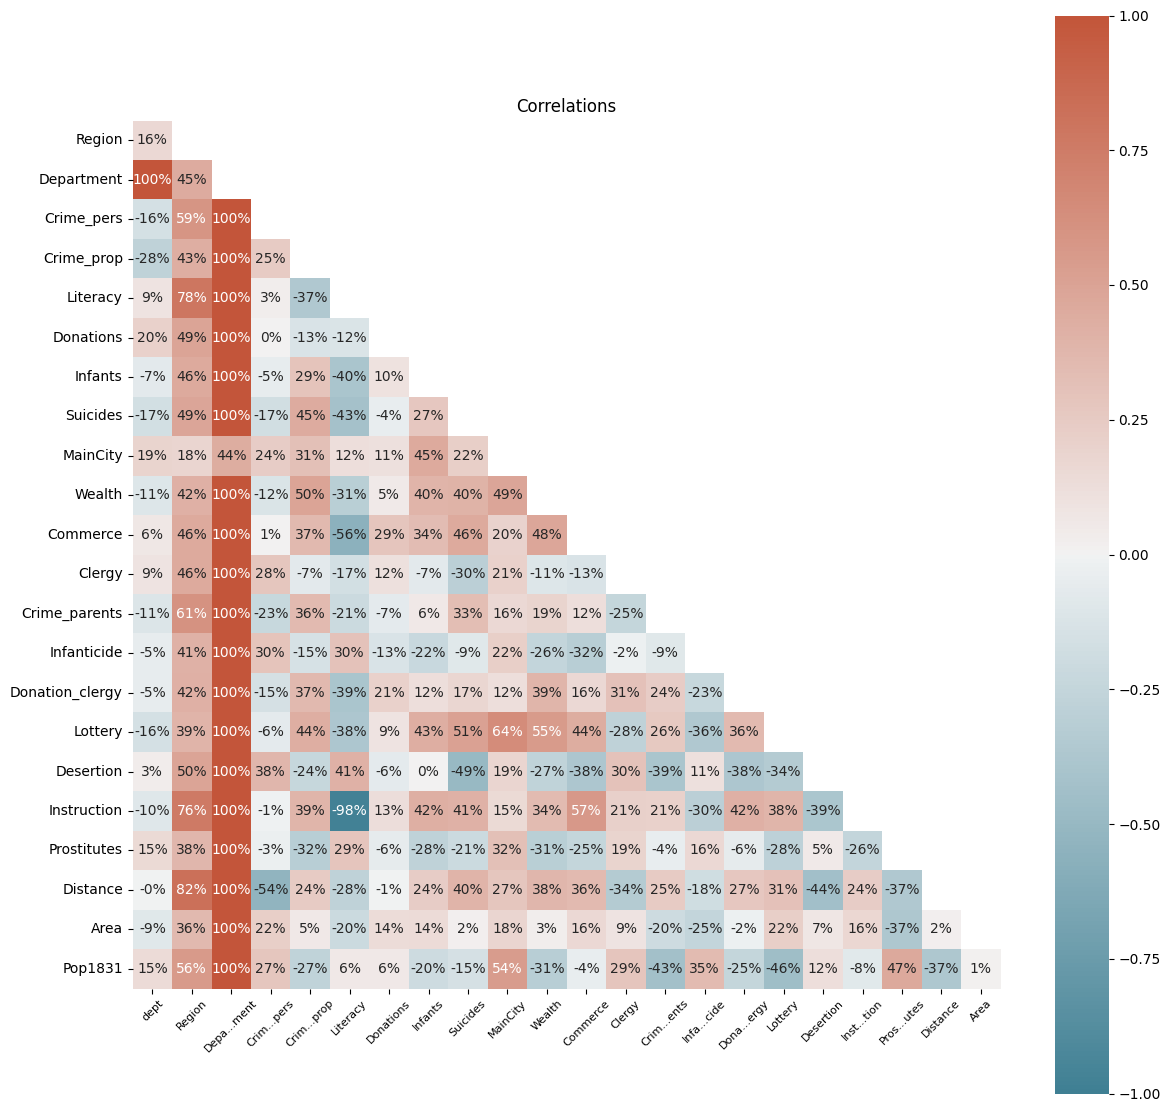

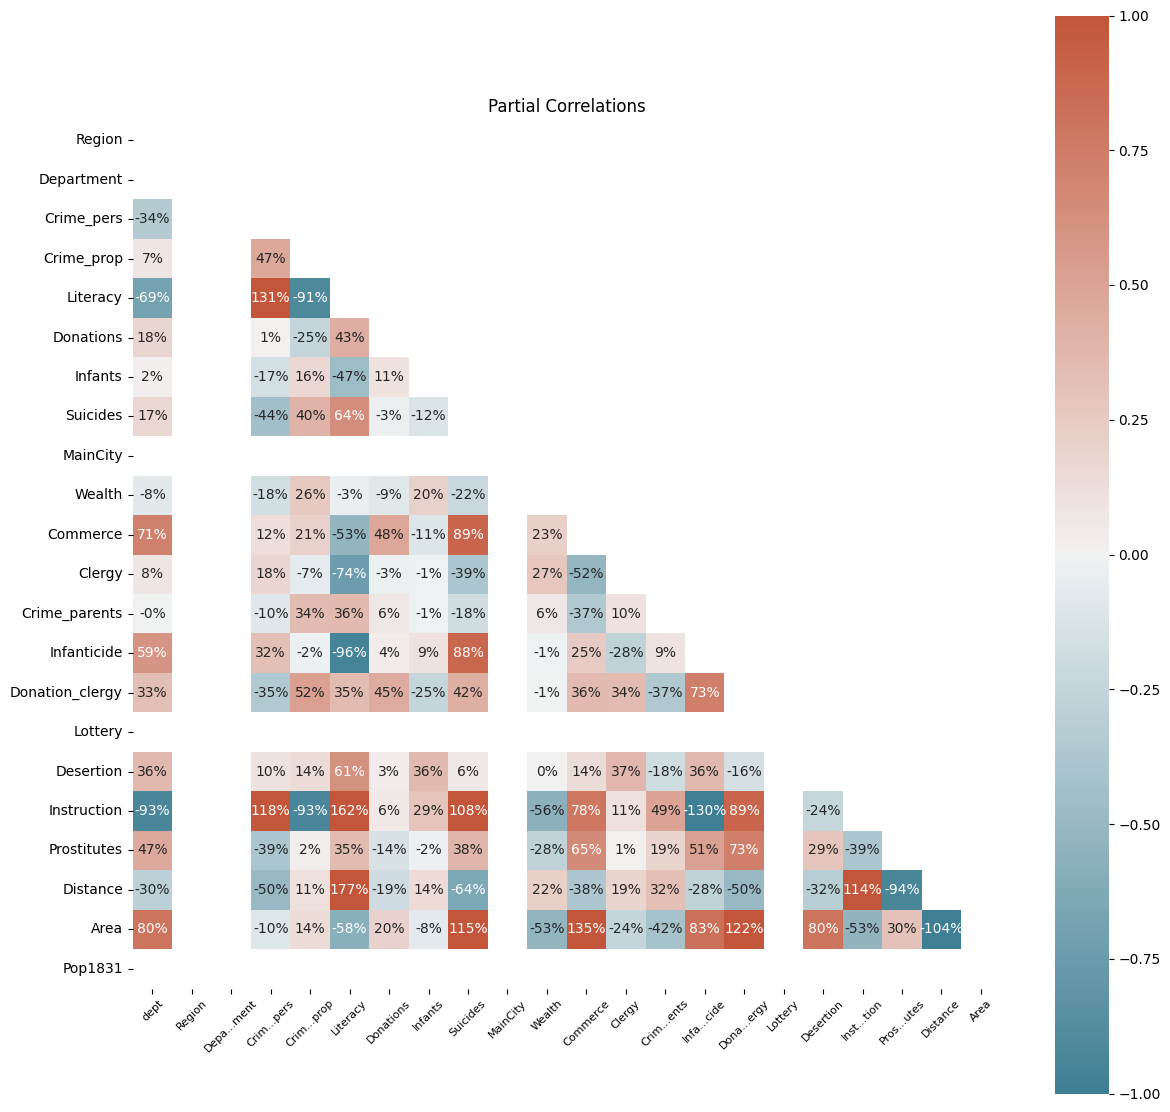

['DATA EXPECTATIONS'] Canceled Data Expectations engine execution due to dataset-expectation suite mismatch.


In [5]:
full_results = dq.evaluate()

## Check the status
After running the data quality checks, you can check the warnings for each individual test. The warnings are suited by priority and have additional details that can provide better insights for Data Scientists.

In [6]:
# Print the overall status of Data Quality discovered during evaluation
dq.report()

Warnings count by priority:
	Priority 1: 2 warning(s)
	Priority 2: 8 warning(s)
	TOTAL: 10 warning(s)
List of warnings sorted by priority:
	[TEST NORMALITY] The label distribution failed to pass a normality test as-is and following a battery of transforms. It is possible that the data originates from an exotic distribution, there is heavy outlier presence or it is multimodal. Addressing this issue might prove critical for regressor performance. (Priority 1: heavy impact expected)
	[DUPLICATE COLUMNS] Found 1 columns with exactly the same feature values as other columns. (Priority 1: heavy impact expected)
	[COLLIDER CORRELATIONS] Found 99 independently uncorrelated variable pairs that showed correlation after controling for the remaining variables. This is an indicator of potential colliding bias with other covariates. (Priority 2: usage allowed, limited human intelligibility)
	[OUTLIER DETECTION] Found 2 potential outliers across the full dataset. A distance bigger than 3.0 standard d

### Quality Warning

In [7]:
# Get a sample warning
sample_warning = dq.get_warnings()[3]

In [8]:
# Check the details
sample_warning.test, sample_warning.description, sample_warning.priority

('Outlier Detection',
 'Found 2 potential outliers across the full dataset. A distance bigger than 3.0 standard deviations of intra-cluster distances to the respective centroids was used to define the potential outliers.',
 <Priority.P2: 2>)

In [9]:
# Retrieve the relevant data from the warning
sample_warning_data = sample_warning.data

In [10]:
# With get_warnings you can also filter the warning list by specific conditions
duplicate_quality_warnings = dq.get_warnings(category='Duplicates')
priority_2_warnings = dq.get_warnings(priority=2)